# Project: Investigate a Dataset - TMDb movie data
## Table of Coentents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [ ]:
!pip install pandoc

<a id='intro'></a>
## Introduction

### Dataset Description 

- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

### Key Column Descriptions

   - `Popularity` : A numeral metric for the popularity of the chosen movie.
   - `Budget` : The allocated budget for the movie.
   - `Director` : Movie director.
   - `overview` : A short description about the movie.
   - `Genres` : List of genres for the movie.
   - `release_date` : Release date of the movie.
   - `homepage` : website link for the movie.
   - `original_title` : Name of the movie.

### Question(s) for Analysis
 
 1. **Which genres are most popular from year to year?**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

- In this section of the report, the  data will be **loaded**, checked for **cleanliness**, and then **trimmed** and **cleaned** for analysis.


In [2]:
# reading the dataset
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

print(f"""The number of rows is : {df.shape[0]}
The number of columns is : {df.shape[1]}""")


The number of rows is : 10866
The number of columns is : 21


In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The dataset has a **duplicate** which is **dropped.**

In [4]:
print(f"The number of duplicates is : {df[df.duplicated].shape[0]}")
df.drop_duplicates(inplace=True)

The number of duplicates is : 1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

print(df.shape[0])
df['original_title'].value_counts()

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Cleaning strategy:

  - The rows where all column values are null will be removed.
  - Drop rows that have more than 5 missing values.
  
  - `imdb_id` and `homepage` columns will be dropped as they serve no purpose in the analysis.
  
  - `Release_date` will be transformed into a **datetime** object, `release_year` column to be dropped.
  
  - Every movie that has **multi-genres** will be separated into separate rows, each row corresponding to one **genre**. This is done in order to facilitate computing **genre** statistics and answering the respective question.
  - `Website` column is not essential for the analysis, plus has too many missing values, so it will be dropped.
  - `Company names`,  'overview','keywords',
    'tagline',
    'production_companies',
    'cast',
    'director',
    'genres' that are missing will be replaced with **Unknown**
  - Changing the datatype of genres to **categorical** to save space.


### Data Cleaning

- This section of the report contains the steps followed to **clean** the dataset. 
#### Dropping rows where all column values are null:
- These columns are utterly useless, they are dropped.


In [7]:
# Finding the number of rows where all columns have missing values. 

df.isna().all().sum()

0

- There are no totally **null** rows, so no further action is needed.

#### Dropping rows where more than 5 column values are null:

- These rows have too many **null** values to be useful. So they are dropped

In [8]:
more_than_5_null_rows = df[(df.isna().sum(axis=1) > 5)]
more_than_5_null_rows.shape[0]

8

- 8 **rows** have this property. Some are shown below.

In [9]:
more_than_5_null_rows.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.0,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.0,0.0


- These rows are **removed** below.

In [10]:
# Get the index of the rows to be dropped
index_5_rows = more_than_5_null_rows.index

# Dropping rows that have more than 5 null values
df.drop(index=index_5_rows, inplace=True)

# Making sure they were correctly dropped
(df.isna().sum(axis=1) > 5).sum()

0

#### Dropping `imdb_id` and `homepage`

- `imdb_id` and `homepage` are useless when it comes to analysis, so they are dropped to save space.

In [11]:
df.drop(columns=['homepage', 'imdb_id'], inplace=True)
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      72
director                  38
tagline                 2816
keywords                1485
overview                   3
runtime                    0
genres                    19
production_companies    1023
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

- `homepage` and `imdb_id` are not shown in the above list as they were **removed**.

#### Filling NA values in the listed columns with `Unknown`.
- There are too many **missing** values for some of these **columns**. Dropping them or dropping NA values would be harmful for the **analysis**.

In [12]:
list_of_columns=[
    'overview',
    'keywords',
    'tagline',
    'production_companies',
    'cast',
    'director',
    'genres'
]

df[list_of_columns]=df[list_of_columns].fillna(value='Unknown')
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

- There are no more **missing** values as shown above

#### Changing the release_date into a datetime object.
- This is done so that their attributes can be easily extracted as needed
- Space is saved by dropping the `release_year` column

In [13]:
# Creates a datetime object
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

# to_datetime() interprets years from 00 to 69 as 2000 to 2069 respectively, but the dataset interprets anything above 
# 30 as in the 1900s. The code below accounts for this assumption.

df['release_date'] = df['release_date'].apply(lambda x: x.replace(year=x.year - 100) if x.year >= 2030 else x)
convert_to_year = df['release_date'].apply(lambda x : x.year)

# Check if all years were correctly transformed
(convert_to_year == df['release_year']).all()

True

#### Dropping  release_year column.
- This column information can be readily extracted from `release_date` column.
- `release_year` column is removed accordingly

In [14]:
# Drop 'release_year' column as it is unnecessary (its information is presented by release_date)
df.drop(columns='release_year', axis=1, inplace=True)

# Check if release_year was correctly dropped
if 'release_year' not in df.columns:
    print("release_year no longer in df")
else:
    print("release_year still in df")

release_year no longer in df


####  Expanding the multi-valued columns into seperate rows.

- This is done in order to facilitate **analysis** and **visualization** of plots related to `genres` or other multivalued columns

In [15]:
# Function that takes a multi-valued column and explodes each
# value into multiple rows
def explode_column(df, column_name):
    
    # turn the multi-valued column into a list
    df[column_name] = df[column_name].str.split('|')
    
    # explode the multi-valued column into multiple rows
    df = df.explode(column_name)
    return df
    


In [16]:
columns_to_expand = ['genres']

for col in columns_to_expand:
    df = explode_column(df, col)
    
    
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08


- There are multiple **rows** for each **movie** now.

#### Changing the datatype of `genres` to **category**.

- Doing so tremendously saves memory space.

In [17]:
df['genres'] = df['genres'].astype('category')
df['genres'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'Unknown', 'War',
                  'Western'],
, ordered=False)

<a id='eda'></a>
## Exploratory Data Analysis



- This section deals with the statistics and visualizations. The utmost goal is to address the research question posed in the Introduction section



### Research Question 1 (Which genres are most popular from year to year?)
This question will be approached as follows:
- Showing the **descriptive statistics** to get a feel about the data.
- Making a **pie plot** to visualize the **distribution** of the `genres`.
- Grouping by `genres` and `release_year`, finding the average popularity for each, and then extracting the **genre** that has the maximum `popularity`.
- Showing the dataframe that represents the **year-best_genre** pairs.
- Making a **barplot** that details the best genre for each year, from 1960 to 2015.
- Making a **heatmap** that details each genre `popularity` for years from **2000** to **2015**.

- Another approach is to get the sum of **popularities** instead of the mean. This means that if so many movies were characterized with a specific `genre`, then this `genre` will become the most **popular** regardless of how the `popularity` of the individual movie compares with other movies.


#### Descriptive statistics

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,26968.000000,26968.000000,2.696800e+04,2.696800e+04,26968.000000,26968.000000,26968.000000,2.696800e+04,2.696800e+04
mean,58729.744809,0.705853,1.749937e+07,4.742078e+07,102.790863,249.888794,5.956537,2.102931e+07,6.086051e+07
std,86758.753496,1.114776,3.460272e+07,1.321823e+08,30.399658,637.886676,0.912144,3.819389e+07,1.614971e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10201.000000,0.224462,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,18216.000000,0.411259,9.700000e+01,0.000000e+00,99.000000,44.000000,6.000000,1.047242e+02,0.000000e+00
75%,58428.000000,0.774598,2.000000e+07,3.052651e+07,112.000000,173.000000,6.600000,2.704173e+07,4.360521e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


#### Visualization with Pie Chart

- The cell below creates the **counts** dataframe for the genres. This dataframe will be **visualized** next.

In [19]:
genre_counts = df['genres'].value_counts()
(genre_counts/genre_counts.sum()) * 100

Drama              17.650549
Comedy             14.061109
Thriller           10.779442
Action              8.840107
Romance             6.348265
Horror              6.070157
Adventure           5.454613
Crime               5.020765
Science Fiction     4.557253
Family              4.557253
Fantasy             3.396618
Mystery             3.003560
Animation           2.588253
Documentary         1.920795
Music               1.512904
History             1.238505
War                 1.001187
Foreign             0.697123
TV Movie            0.619252
Western             0.611836
Unknown             0.070454
Name: genres, dtype: float64

In [20]:
# Custom function for autopct to hide small percentages

def autopct_threshold(pct):
    return ('%1.1f%%' % pct) if pct >= 3 else ''

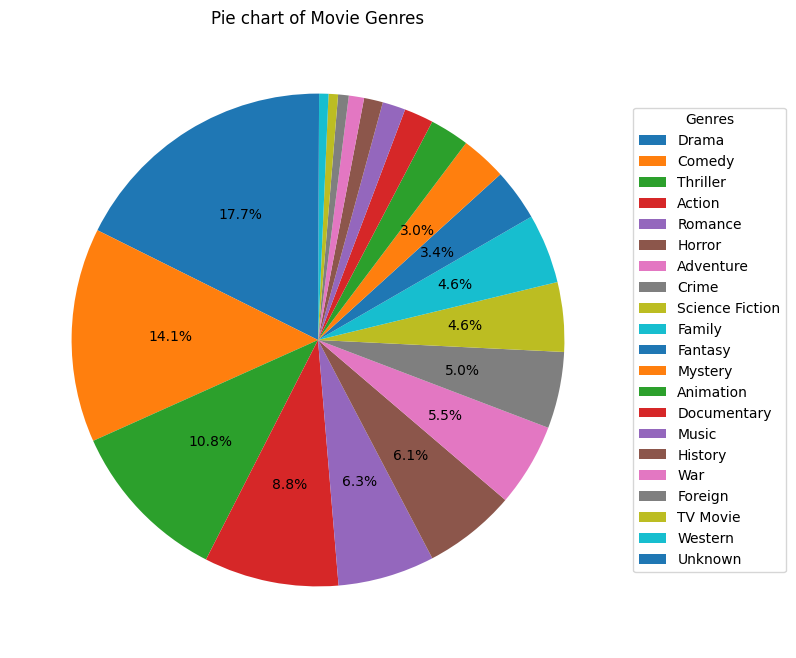

In [21]:

# Create the pie plot without labels
genre_counts.plot(kind='pie',
                  figsize=(8, 8),
                  autopct=autopct_threshold,
                  startangle=90,
                  labels=None # labels=None removes labels on slices
                 )  
plt.title('Pie chart of Movie Genres')
plt.ylabel('')  # Remove the default ylabel

# Add a legend
plt.legend(genre_counts.index, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

 - The above **pie chart** shows the percentage of `genres` for the whole dataset. It is clear that **drama** has the most percentage with **17.7%**. It is followed by **Comedy** and **Thriller**.

#### Creating a dataframe that contains year - best_genre pairs

- This code cell defines a general function that takes the **dataframe**, **column to be grouped**, and the **operation** of aggregation (sum, mean etc)

In [22]:
# Function that takes the dataframe, name of the column to be grouped,
# and the operation to be performed on the group, and returns a dataframe
# having the release date, max popularity corresponding to the operation,
# and the `group_column` corresponding to the maximum of such operation.


def get_grouped_dataframe(df, group_column, operation):

    # Group by genres and year, calculate the op (mean or sum etc) popularity
    grouped_columns = df.groupby([group_column, df.release_date.dt.year])['popularity'].apply(operation).reset_index()


    # Find the index of the operation (sum, mean etc) popularity for each year
    op_popularity_idx = grouped_columns.groupby('release_date')['popularity'].idxmax()

    # Extract the columns and popularity for the max popularity for each year
    op_popularity_column = grouped_columns.loc[op_popularity_idx]

    # Display the result (both desired_column and popularity)
    op_popularity_column.set_index('release_date', inplace=True)
    
    return op_popularity_column

In [23]:
max_popularity_genre_mean=get_grouped_dataframe(df, 'genres', np.mean)
max_popularity_genre_mean

,genres,popularity
release_date,,
1960,Thriller,0.811910
1961,Animation,2.631987
1962,Adventure,0.942513
1963,Animation,2.180410
1964,War,0.930959
1965,Music,0.968850
1966,Animation,0.585717
1967,Animation,1.348805
1968,Mystery,1.519456


#### Visualization with barplot
- The code below creates a **barplot**. The **barplot** advantage lies in the fact that it can concisely show the most popular `genre` for each year from **1960** to **2015**. This conciseness cannot be beat.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_plot(df, column_name, grouped_column, title, xlabel, ylabel, palette='hls'):

    plt.figure(figsize=(12, 8))
    sns.barplot(x=df.index, y=df[column_name], hue=df[grouped_column], 
                palette='hls', dodge=False)
    plt.xticks(rotation=90) 
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=grouped_column, bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.show()

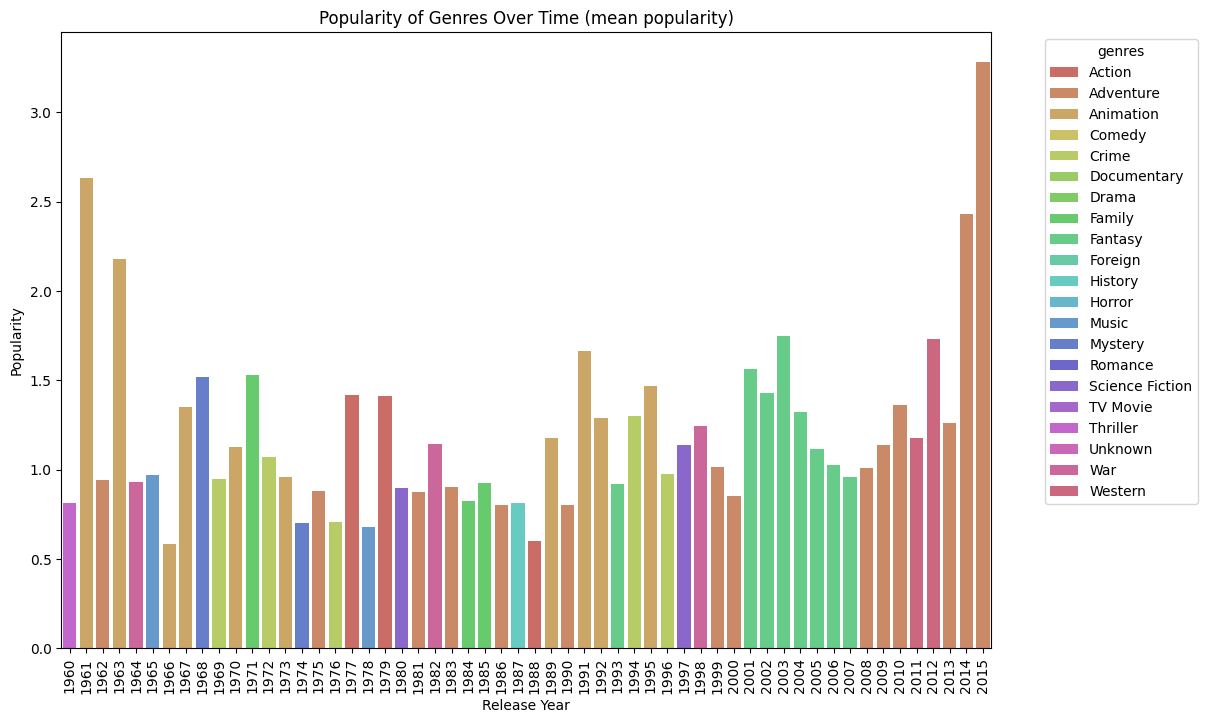

In [25]:
bar_plot(df=max_popularity_genre_mean,
         column_name='popularity',
         grouped_column='genres',
         title='Popularity of Genres Over Time (mean popularity)',
         xlabel='Release Year',
         ylabel='Popularity'
        )

- The above barchart shows clearly which `genre` is popular in a given year. For instance, years from **2001** to **2007** have **Fantasy** as the most popular `genre`.

- This does not mean that **Drama** is the most popular of all time. This goes to **Adventure**

#### Visualization with Heatmap

- The heatmap can display the `popularity` of each **movie**, not just the most **popular** one. However,  for clarity in the **visualization**, it was determined that only years from **2000** to **2015** were to be visualized.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def heatmap_plot(df, column_name, grouped_column, title, xlabel, ylabel, cmap='YlGnBu', rot=45):

    # Pivot the data
    heatmap_data = grouped_genres.pivot(index=grouped_column, columns="release_date", values=column_name)

    # Create the heatmap
    plt.figure(figsize=(14, 10))  # Increased figure size
    sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rot)  # Rotate x-axis labels
    plt.show()

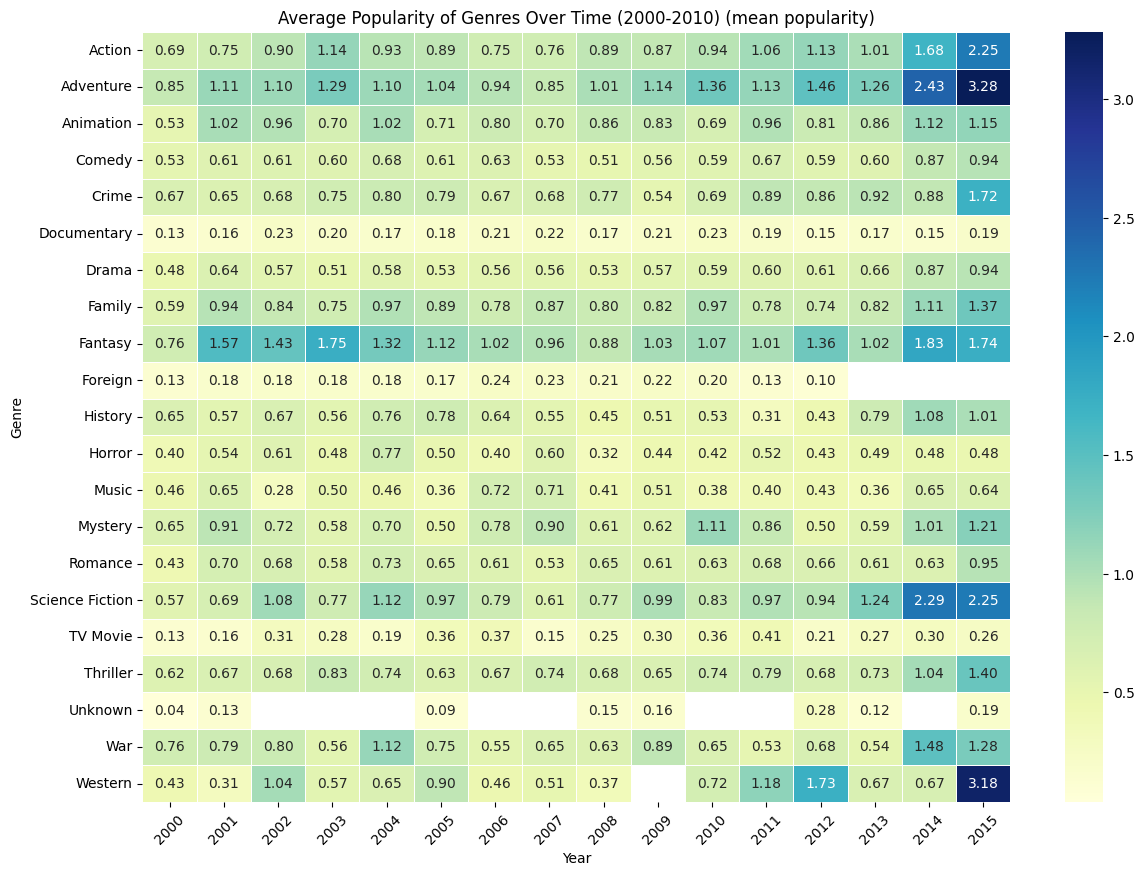

In [27]:
# Filter data for years above 2000
filtered_df = df[(df['release_date'].dt.year >= 2000)]

grouped_genres = filtered_df.groupby(['genres', filtered_df['release_date'].dt.year])['popularity'].mean(numeric_only=True).reset_index()

heatmap_plot(df=max_popularity_genre_mean,
         column_name='popularity',
         grouped_column='genres',
         title='Average Popularity of Genres Over Time (2000-2010) (mean popularity)',
         xlabel='Year',
         ylabel='Genre'
        )


- The above **heatmap** shows clearly which `genre` is the most popular in years from **2000** to **2015**. It also shows a **quanitative metric** to compare the `genres`. For instance, **Adventure** in **2002** has a popularity metric of **1.10**, whereas **science fiction** has a popularity metric of **1.08**, this means that **Adventure** was slightly more popular than **science fiction** in **2002**.

- The most popular `genre` in **2002** is **Fantasy**, which is **40%** more popular than **Adventure.**

#### The least adventure movie popularity

In [28]:
adventure_df = df[df['genres'] == 'Adventure']
adventure_df['popularity'].min()

0.001531

#### Second approach (Using sum)

- This approach will follow the same systematic procedure as the first, except the sum will be extracted instead of the mean. The same function will be called but `np.mean` is changed to `np.sum`

In [29]:
max_popularity_genre_sum=get_grouped_dataframe(df, 'genres', np.sum)
max_popularity_genre_sum

,genres,popularity
release_date,,
1960,Drama,7.361967
1961,Drama,6.915731
1962,Drama,8.232008
1963,Thriller,7.199292
1964,Comedy,7.859657
1965,Drama,6.105756
1966,Drama,5.436264
1967,Drama,8.183477
1968,Drama,7.546450


#### Visualization with barplot (sum popularity)

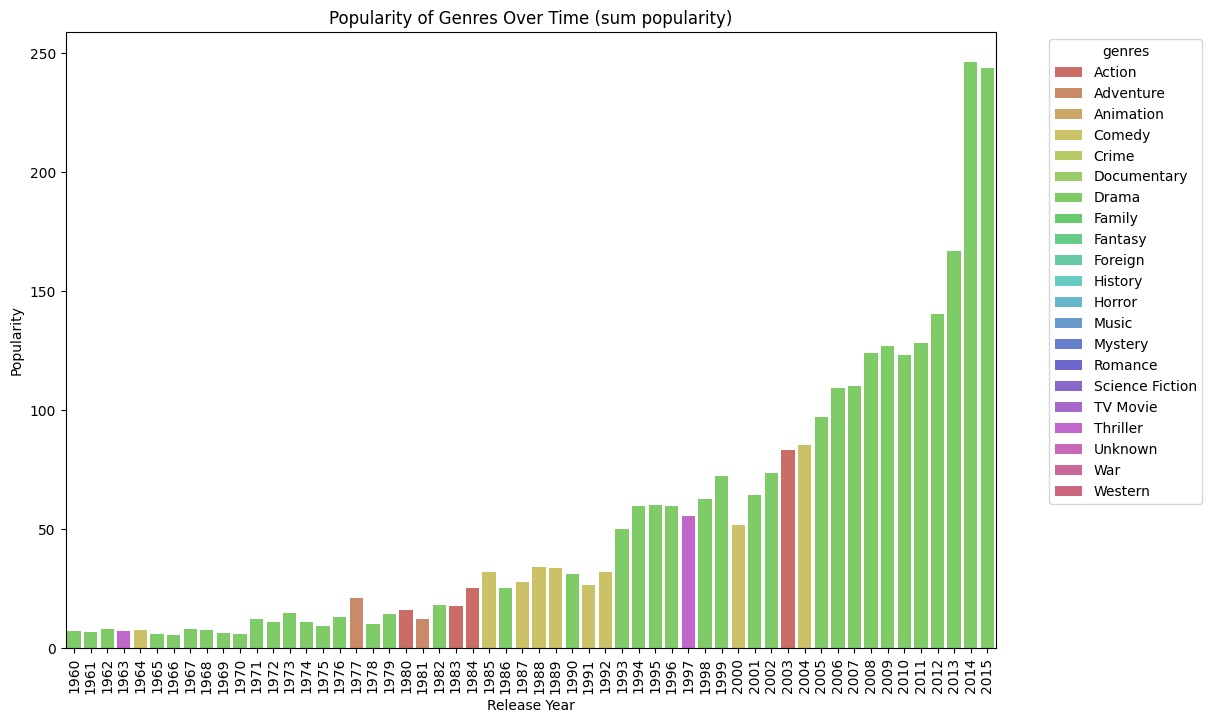

In [30]:
bar_plot(df=max_popularity_genre_sum,
         column_name='popularity',
         grouped_column='genres',
         title='Popularity of Genres Over Time (sum popularity)',
         xlabel='Release Year',
         ylabel='Popularity'
        )

- The **Bar Chart** here depends on popularity as a **sum**. This means that the more movies have a particular `genre`, the more popular it will be quantified
- The above barchart shows clearly which `genre` is popular in a given year. For instance, years from **2005** to **2015** have **Drama** as the most popular `genre`.
- This follows directly from the **Pie Chart** of the previous section, in which was shown that most moveis are categorized as **Drama**

#### Visualization with heatmap (sum popularity)

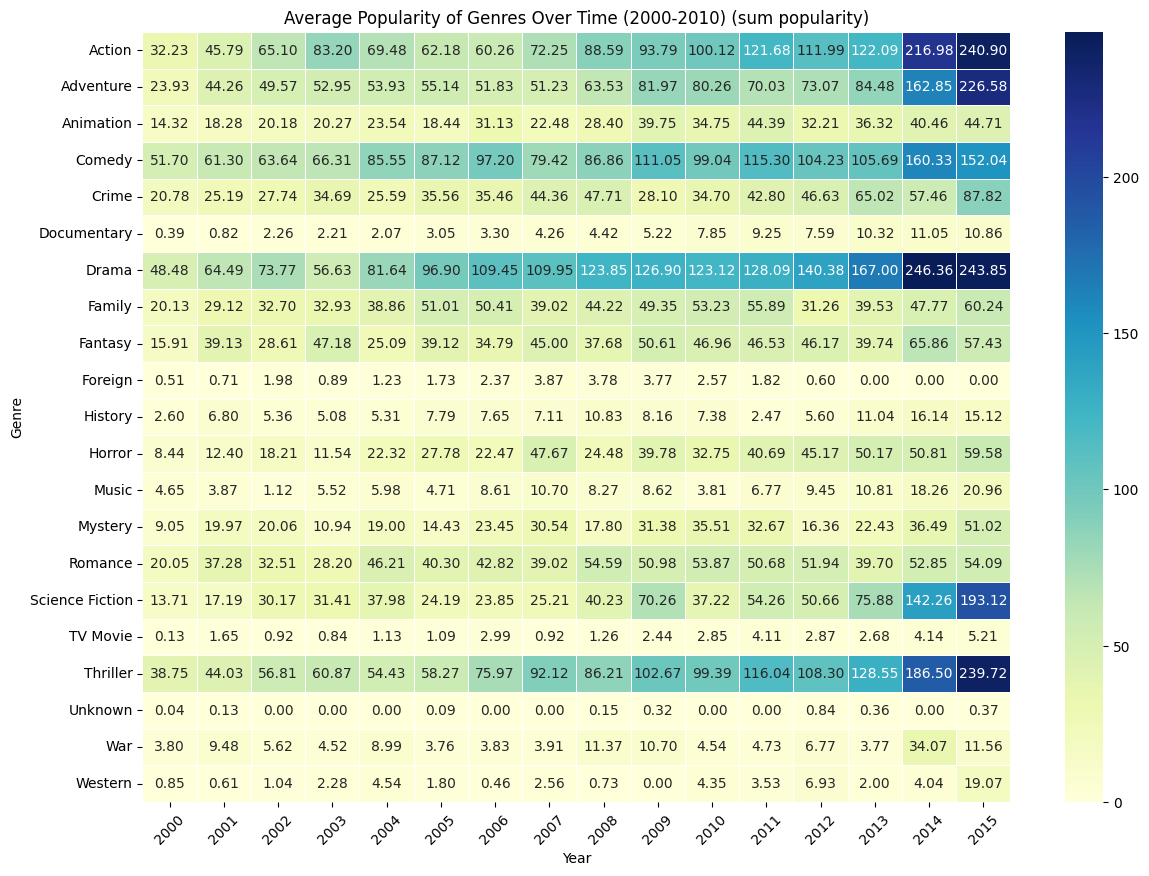

In [31]:
# Filter data for years above 2000
filtered_df = df[(df['release_date'].dt.year >= 2000)]

grouped_genres = filtered_df.groupby(['genres', filtered_df['release_date'].dt.year])['popularity'].sum(numeric_only=True).reset_index()

heatmap_plot(df=max_popularity_genre_sum,
         column_name='popularity',
         grouped_column='genres',
         title='Average Popularity of Genres Over Time (2000-2010) (sum popularity)',
         xlabel='Year',
         ylabel='Genre'
        )

- The above **heatmap** shows clearly which `genre` is the most popular in years from **2000** to **2015**. It also shows a **quanitative metric** to compare the `genres`. For instance, **Comedy** in **2002** has a popularity metric of **63.64**, whereas **Action** has a popularity metric of **65.10**, this means that **Action** was slightly more popular than **Comedy** in **2002**.

- The most popular `genre` in **2002** is **Drama**, which is **13.3%** more popular than **Action.**

In [32]:
# Get the number of times drama was the most popular
drama_count = max_popularity_genre_sum['genres'].value_counts()[0]

# Get the total number of years in the dataset
year_count = 2015 - 1960 + 1

# Get the percentage
print(f"{drama_count/year_count * 100}%")

69.64285714285714%


- Using this metric, **drama** dominates over other `genres` **69.4 %** of the times. 

<a id='conclusions'></a>
## Conclusions
- The **Pie Chart** shows clearly which `genre` appears in most movies. **Drama** is a clear winner with a percentage of **17.7%**
- The above analysis shows the most popular genre for each year. For example, from 2001 to 2007, it is clear that the most popular genre is **Fantasy**. However, this does not translate directly to it being the most popular genre of all time, this goes to the **Adventure** genre.


- This analysis does not mean that every **Adventure** movie will be a hit. As shown above, there is an **adventure** movie with a popularity of 0.0015, which is way below the **mean**. This can be deemed a **limitation** as one cannot infer the `popularity` from `genre`.

- The second approach involved aggregating the popularity of the different `genres` using **summation** instead of the **mean**.
- This uncovered intresting insights that were not obvious with the first approach.
- it is shown that drama is the most popular `genre` of all time, as well as being the most popular `genre` 69.4% years out of all years 


### Limitations and Future Research

- **Correlation between Genre and Other Factors:** This analysis primarily focused on genre and popularity. Further research could investigate the correlation between genre and other factors such as budget, revenue, and critical acclaim. This would provide a more comprehensive understanding of the factors that contribute to a movie's success. For instance, there might be an interplay between movie runtime and viewers perception of a movie being of a specific genre.

- **Predictive Modeling:** Building upon the correlations discovered, future work could explore the development of predictive models to forecast a movie's popularity or success based on its genre and other relevant features. This could be valuable for filmmakers and studios in making informed decisions during the production process.

- **Incorporating External Data:** The current analysis relied solely on the TMDb dataset. Integrating external data sources, such as social media sentiment or critic reviews, could enrich the analysis and potentially reveal new insights. For example, including rating of movies by third party applications like IMDB could be of great value.


In [6]:
# Running this cell will execute a bash command to convert this notebook to a pdf file
!python -m nbconvert --to html Investigate_a_Dataset_final.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset_final.ipynb to html
[NbConvertApp] Writing 1587185 bytes to Investigate_a_Dataset_final.html
